In [47]:
import numpy as np
import pandas as pd

In [48]:
import chardet
with open("spam.csv", 'rb') as rawdata:
    result = chardet.detect(rawdata.read(100000))
result

{'encoding': 'Windows-1252', 'confidence': 0.7270322499829184, 'language': ''}

In [49]:
df = pd.read_csv('spam.csv',encoding = 'Windows-1252')
df.sample(10)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
5151,ham,No problem with the renewal. I.ll do it right ...,NaN,NaN,NaN
4292,ham,You best watch what you say cause I get drunk ...,NaN,NaN,NaN
1473,ham,"Will do, you gonna be at blake's all night? I ...",NaN,NaN,NaN
5032,ham,* Was really good to see you the other day dud...,NaN,NaN,NaN
3812,ham,Pls i wont belive god.not only jesus.,NaN,NaN,NaN
3469,ham,aathi..where are you dear..,NaN,NaN,NaN
2849,ham,She's fine. Good to hear from you. How are you...,NaN,NaN,NaN
2661,ham,Do you know when dad will be back?,NaN,NaN,NaN
2465,ham,S.i think he is waste for rr..,NaN,NaN,NaN
4617,ham,Nvm... I'm going to wear my sport shoes anyway...,NaN,NaN,NaN


In [50]:
# Data cleaning
# EDA
# Text processing
# Model Building
# Evaluation
# Improvement

# Data cleaning

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [52]:
# Dropping columns 
df.drop(columns = ['Unnamed: 2','Unnamed: 3','Unnamed: 4'], inplace = True)

In [53]:
df.sample(10)

,v1,v2
3445,ham,"Mon okie lor... Haha, best is cheap n gd food ..."
4333,ham,Boo what time u get out? U were supposed to ta...
2127,ham,Tessy..pls do me a favor. Pls convey my birthd...
2396,ham,Well you told others you'd marry them...
646,ham,Do you mind if I ask what happened? You dont h...
4242,ham,Okie...
4757,spam,URGENT! Your Mobile number has been awarded wi...
696,ham,"Aight, you close by or still down around alex'..."
1352,ham,Let Ur Heart Be Ur Compass Ur Mind Ur Map Ur S...
5498,ham,Why did I wake up on my own &gt;:(


In [54]:
df.rename(columns = {'v1':'Target','v2':'Text'}, inplace =True)

In [55]:
df.head(10)

,Target,Text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


In [56]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['Target'] = encoder.fit_transform(df['Target'])

In [57]:
df.head(10)

,Target,Text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
5,1,FreeMsg Hey there darling it's been 3 week's n...
6,0,Even my brother is not like to speak with me. ...
7,0,As per your request 'Melle Melle (Oru Minnamin...
8,1,WINNER!! As a valued network customer you have...
9,1,Had your mobile 11 months or more? U R entitle...


In [58]:
# The encoder has assigned spam as 1 and ham(not spam) as 0

In [59]:
#checking missing values
df.isnull().sum()

Target    0
Text      0
dtype: int64

In [60]:
#Check for duplicate values
df.duplicated().sum()

403

In [61]:
#remove duplicates
df = df.drop_duplicates(keep = 'first')

In [62]:
df.shape
df.duplicated().sum()

0

# Exploratory data analysis

In [63]:
import matplotlib.pyplot as plt

In [64]:
counts = df['Target'].value_counts()

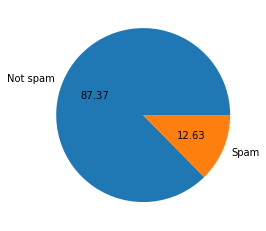

In [65]:
plt.pie(counts, labels = ['Not spam','Spam'],autopct = "%0.2f")
plt.show()

In [66]:
!pip install nltk
import nltk

In [110]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /home/soham/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/soham/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [111]:
df['Text'].apply(len)
df['Number_of_chars'] = df['Text'].apply(len)

In [69]:
df.head(10)

,Target,Text,Number_of_chars
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61
5,1,FreeMsg Hey there darling it's been 3 week's n...,148
6,0,Even my brother is not like to speak with me. ...,77
7,0,As per your request 'Melle Melle (Oru Minnamin...,160
8,1,WINNER!! As a valued network customer you have...,158
9,1,Had your mobile 11 months or more? U R entitle...,154


In [70]:
#This seperates the words and turns them in to a list and creates the data frame
words = df['Text'].apply(lambda x:nltk.word_tokenize(x))

In [71]:
df["Number_of_words"] = words.apply(len)

In [72]:
df.head(10)

,Target,Text,Number_of_chars,Number_of_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15
5,1,FreeMsg Hey there darling it's been 3 week's n...,148,39
6,0,Even my brother is not like to speak with me. ...,77,18
7,0,As per your request 'Melle Melle (Oru Minnamin...,160,31
8,1,WINNER!! As a valued network customer you have...,158,32
9,1,Had your mobile 11 months or more? U R entitle...,154,31


In [73]:
sent = df['Text'].apply(lambda x:nltk.sent_tokenize(x))

In [74]:
df['Number_of_sent'] = sent.apply(len)

In [75]:
df.head(10)

,Target,Text,Number_of_chars,Number_of_words,Number_of_sent
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1
5,1,FreeMsg Hey there darling it's been 3 week's n...,148,39,4
6,0,Even my brother is not like to speak with me. ...,77,18,2
7,0,As per your request 'Melle Melle (Oru Minnamin...,160,31,2
8,1,WINNER!! As a valued network customer you have...,158,32,5
9,1,Had your mobile 11 months or more? U R entitle...,154,31,3


In [76]:
df[['Number_of_chars','Number_of_words','Number_of_sent']].describe()

,Number_of_chars,Number_of_words,Number_of_sent
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455407,1.961308
std,58.236293,13.322448,1.432583
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [77]:
df[df['Target'] == 0][['Number_of_chars','Number_of_words','Number_of_sent']].describe() #not spam

,Number_of_chars,Number_of_words,Number_of_sent
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123339,1.815545
std,56.358207,13.491315,1.364098
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [78]:
df[df['Target'] == 1][['Number_of_chars','Number_of_words','Number_of_sent']].describe() #spam

,Number_of_chars,Number_of_words,Number_of_sent
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.969372
std,30.137753,7.008418,1.488910
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


<AxesSubplot:xlabel='Number_of_chars', ylabel='Count'>

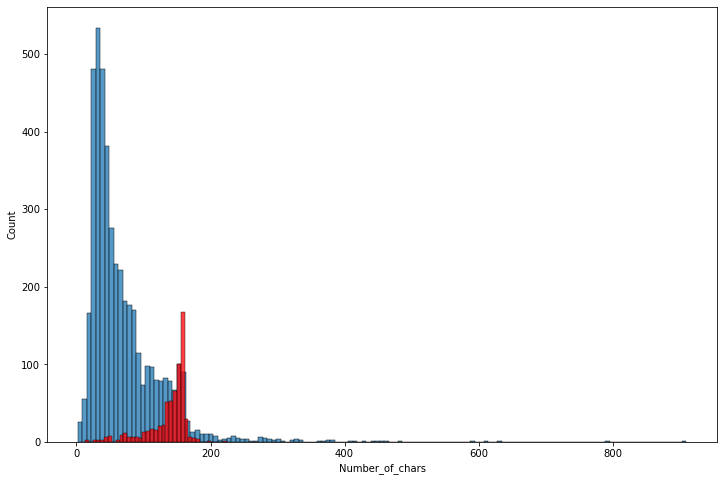

In [79]:
import seaborn as sns
plt.figure(figsize = (12,8))
sns.histplot(df[df['Target'] == 0]['Number_of_chars'])
sns.histplot(df[df['Target'] == 1]['Number_of_chars'], color = "red")

<AxesSubplot:xlabel='Number_of_words', ylabel='Count'>

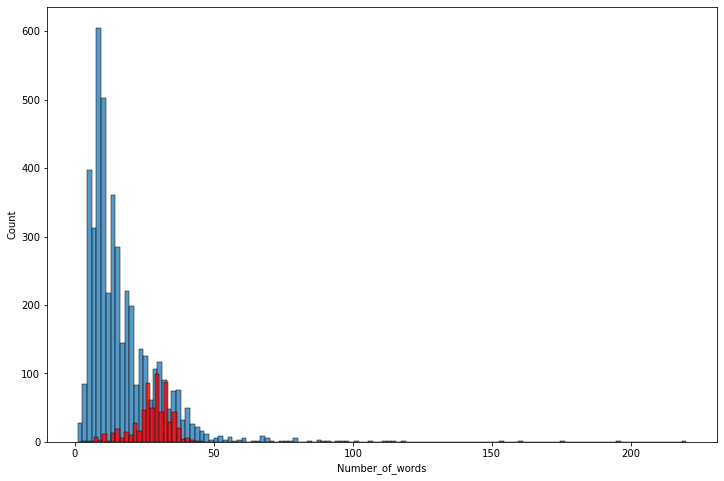

In [80]:
plt.figure(figsize = (12,8))
sns.histplot(df[df['Target'] == 0]['Number_of_words'])
sns.histplot(df[df['Target'] == 1]['Number_of_words'], color = "red")

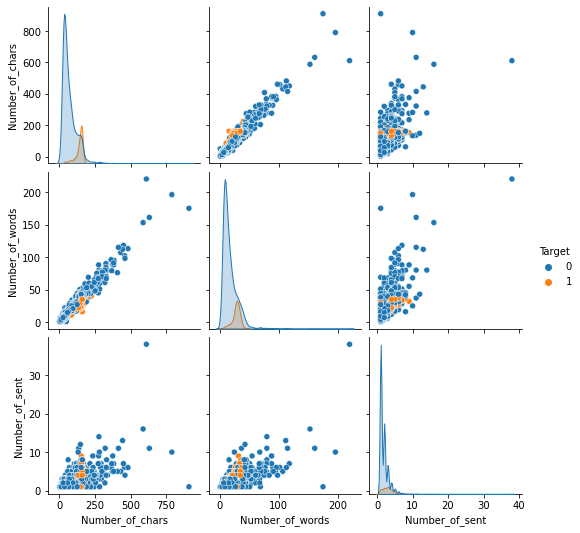

In [81]:
sns.pairplot(df,hue = "Target")

In [82]:
cor = df.corr()
cor

,Target,Number_of_chars,Number_of_words,Number_of_sent
Target,1.000000,0.384717,0.262969,0.267602
Number_of_chars,0.384717,1.000000,0.965784,0.626118
Number_of_words,0.262969,0.965784,1.000000,0.680882
Number_of_sent,0.267602,0.626118,0.680882,1.000000


<AxesSubplot:>

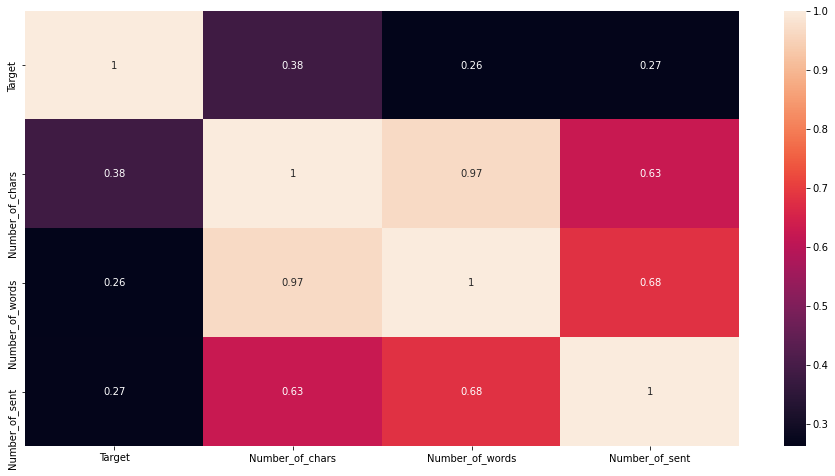

In [83]:
plt.figure(figsize = (16,8))
sns.heatmap(cor,annot = True)

#number of words has the highest corelation with the target

### After this analysis we found out that sms/emails with higher number of characters are more likely to be scam. Same goes for the number of words, however there are some outliers in this case which can hinder our classification. So we will most likely use number of characters as a parameter for classification.

# Data Pre-Processing

In [198]:
from nltk.corpus import stopwords
import string
from nltk.stem.porter import PorterStemmer

string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [199]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [200]:
i = "if"
if i in stopwords.words('english'):
    print('True')

True


In [201]:
ps = PorterStemmer()
ps.stem('Playing')

'play'

In [207]:
from nltk.corpus import stopwords
import string
def transform_text(text):
    text = text.lower() #Converting it into lower case
    text = nltk.word_tokenize(text) #Tokenizing and seperating all the words
    cleaned_data = []
    for i in text:
        if i.isalnum():  #Only keeping the alpha numeric words in the email/sms
            cleaned_data.append(i)
        
    text = cleaned_data
    cleaned_data = []
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation: #Removing unnceassry words and punctuations
            cleaned_data.append(i)
    
    
    text = cleaned_data
    cleaned_data = []
    
    #Stemming
    for i in text:
        cleaned_data.append(ps.stem(i))
        
    return " ".join(cleaned_data)
    
    


In [208]:
transform_text("If this is a test lmao 4416684 yourself is a man () /-sjxshbc playing crying joining reducing")

'test lmao 4416684 man play cri join reduc'

In [211]:
df["transformed_text"] = df["Text"].apply(transform_text)

In [212]:
df.head(10)

,Target,Text,Number_of_chars,Number_of_words,Number_of_sent,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though
5,1,FreeMsg Hey there darling it's been 3 week's n...,148,39,4,freemsg hey darl 3 week word back like fun sti...
6,0,Even my brother is not like to speak with me. ...,77,18,2,even brother like speak treat like aid patent
7,0,As per your request 'Melle Melle (Oru Minnamin...,160,31,2,per request mell oru minnaminungint nurungu ve...
8,1,WINNER!! As a valued network customer you have...,158,32,5,winner valu network custom select receivea pri...
9,1,Had your mobile 11 months or more? U R entitle...,154,31,3,mobil 11 month u r entitl updat latest colour ...


In [215]:
from wordcloud import WordCloud

In [214]:
!pip install wordcloud

     |████████████████████████████████| 371 kB 326 kB/s eta 0:00:01


In [242]:
wc = WordCloud(width = 1000, height = 1000,min_font_size = 15,background_color = "white")
spam_wc = wc.generate(df[df['Target'] == 1]['transformed_text'].str.cat(sep = " "))


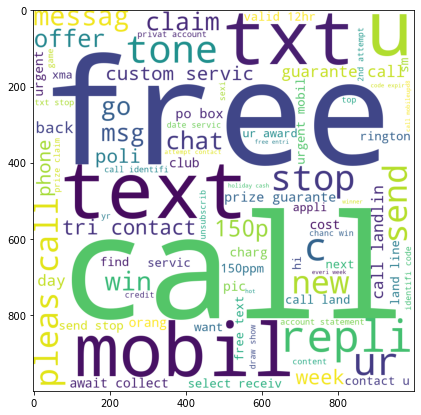

In [243]:
plt.figure(figsize = (15,7))
plt.imshow(spam_wc)

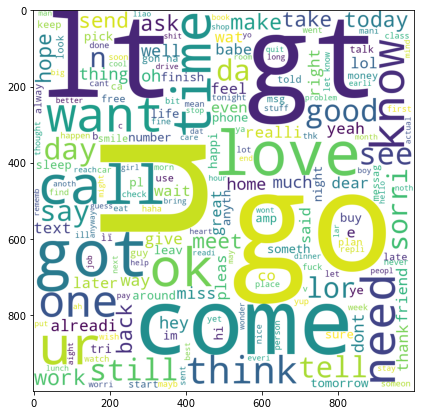

In [241]:
plt.figure(figsize = (15,7))
not_spam_wc = wc.generate(df[df['Target'] == 0]['transformed_text'].str.cat(sep = " "))
plt.imshow(not_spam_wc) 

## Finding the most used words

In [250]:
spam_corpus = []
for msg in df[df['Target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)
len(spam_corpus)

9939

In [248]:
print(spam_corpus)

['free', 'entri', '2', 'wkli', 'comp', 'win', 'fa', 'cup', 'final', 'tkt', '21st', 'may', 'text', 'fa', '87121', 'receiv', 'entri', 'question', 'std', 'txt', 'rate', 'c', 'appli', '08452810075over18', 'freemsg', 'hey', 'darl', '3', 'week', 'word', 'back', 'like', 'fun', 'still', 'tb', 'ok', 'xxx', 'std', 'chg', 'send', 'rcv', 'winner', 'valu', 'network', 'custom', 'select', 'receivea', 'prize', 'reward', 'claim', 'call', 'claim', 'code', 'kl341', 'valid', '12', 'hour', 'mobil', '11', 'month', 'u', 'r', 'entitl', 'updat', 'latest', 'colour', 'mobil', 'camera', 'free', 'call', 'mobil', 'updat', 'co', 'free', '08002986030', 'six', 'chanc', 'win', 'cash', '100', 'pound', 'txt', 'csh11', 'send', 'cost', '6day', 'tsandc', 'appli', 'repli', 'hl', '4', 'info', 'urgent', '1', 'week', 'free', 'membership', 'prize', 'jackpot', 'txt', 'word', 'claim', '81010', 'c', 'lccltd', 'pobox', '4403ldnw1a7rw18', 'xxxmobilemovieclub', 'use', 'credit', 'click', 'wap', 'link', 'next', 'txt', 'messag', 'click',

In [252]:
from collections import Counter
Counter(spam_corpus) #Counting all the words in the msessages


Counter({'free': 191,
         'entri': 21,
         '2': 155,
         'wkli': 9,
         'comp': 8,
         'win': 48,
         'fa': 2,
         'cup': 3,
         'final': 14,
         'tkt': 2,
         '21st': 1,
         'may': 6,
         'text': 122,
         '87121': 2,
         'receiv': 31,
         'question': 9,
         'std': 6,
         'txt': 141,
         'rate': 26,
         'c': 45,
         'appli': 24,
         '08452810075over18': 1,
         'freemsg': 14,
         'hey': 5,
         'darl': 2,
         '3': 20,
         'week': 49,
         'word': 21,
         'back': 20,
         'like': 12,
         'fun': 8,
         'still': 5,
         'tb': 1,
         'ok': 5,
         'xxx': 10,
         'chg': 2,
         'send': 60,
         'rcv': 2,
         'winner': 13,
         'valu': 8,
         'network': 26,
         'custom': 42,
         'select': 26,
         'receivea': 1,
         'prize': 82,
         'reward': 9,
         'claim': 98,
         'cal

In [254]:
Counter(spam_corpus).most_common(30) #counting the most common  words

[('call', 320),
 ('free', 191),
 ('2', 155),
 ('txt', 141),
 ('text', 122),
 ('u', 119),
 ('ur', 119),
 ('mobil', 114),
 ('stop', 104),
 ('repli', 103),
 ('claim', 98),
 ('4', 97),
 ('prize', 82),
 ('get', 74),
 ('new', 64),
 ('servic', 64),
 ('tone', 63),
 ('send', 60),
 ('urgent', 57),
 ('nokia', 57),
 ('contact', 56),
 ('award', 55),
 ('phone', 52),
 ('cash', 51),
 ('pleas', 51),
 ('week', 49),
 ('win', 48),
 ('c', 45),
 ('collect', 45),
 ('min', 45)]

In [258]:
common_spam_words = pd.DataFrame(Counter(spam_corpus).most_common(30))

In [259]:
common_spam_words.head()

,0,1
0,call,320
1,free,191
2,2,155
3,txt,141
4,text,122


/home/soham/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<function matplotlib.pyplot.show(close=None, block=None)>

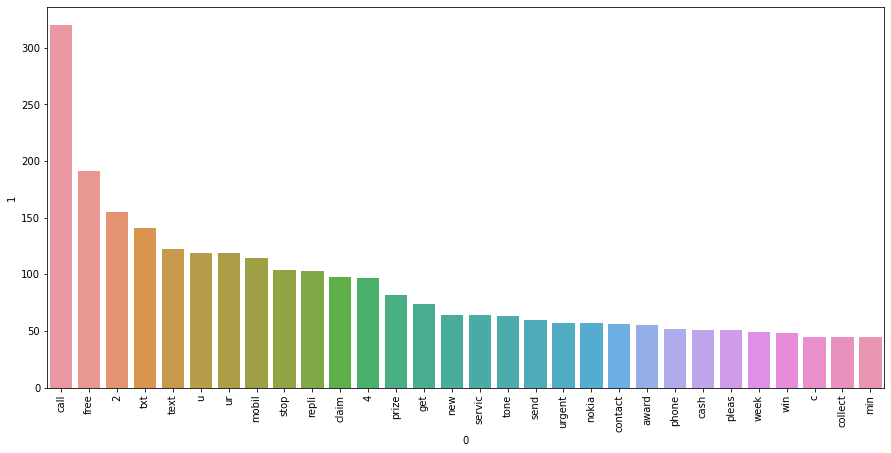

In [262]:
plt.figure(figsize = (15,7))
sns.barplot(common_spam_words[0],common_spam_words[1]) #selecting col 0 and 1
plt.xticks(rotation = "vertical") #rotating the label in x axis
plt.show

/home/soham/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<function matplotlib.pyplot.show(close=None, block=None)>

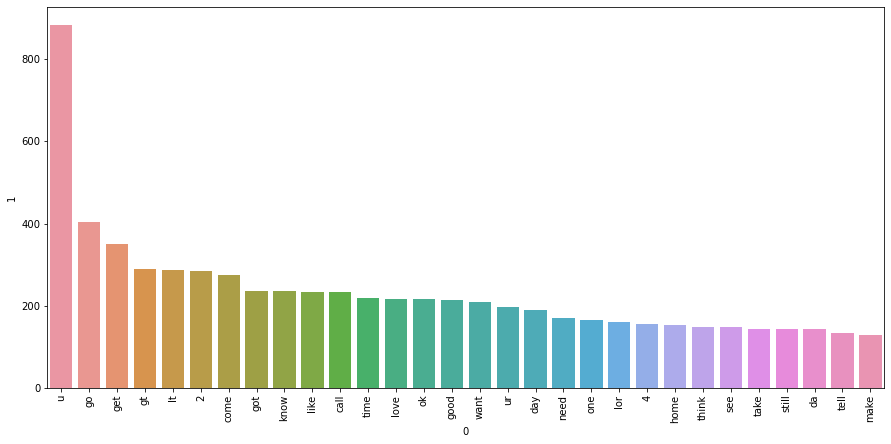

In [263]:
ham_corpus = []
for msg in df[df['Target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)
        
common_ham_words = pd.DataFrame(Counter(ham_corpus).most_common(30))
plt.figure(figsize = (15,7))
sns.barplot(common_ham_words[0],common_ham_words[1]) #selecting col 0 and 1
plt.xticks(rotation = "vertical") #rotating the label in x axis
plt.show